In [1]:
import numpy as np
import pylab as p
from time import time

In [2]:
def ln_omega(M,N):
    return N*np.log(N) -(N+M)*0.5*np.log((N+M)/2) -(N-M)*0.5*np.log((N-M)/2) +0.5*np.log(2*N/(np.pi*(N**2-M**2)))
N = 200
M = np.arange(-(N-1),N,1)




In [3]:
def energia(M,N):
    return (N**2-M**2)/2/(N-1)

In [4]:
def valor_medio(M,N,beta):
    C = np.max(ln_omega(M,N) - beta*energia(M,N))
    A=np.sum(np.abs(M)/N*np.exp(ln_omega(M,N)-beta*energia(M,N) - C))
    B =np.sum(np.exp(ln_omega(M,N)-beta*energia(M,N) - C))
    return (A + 2*np.exp(-beta*energia(N,N) - C))/(B+2*np.exp(-beta*energia(N,N) - C))
N = 10000
M = np.arange(-(N-2),N,2)
valor_medio(M,N,0.1)


0.0084102707987791219

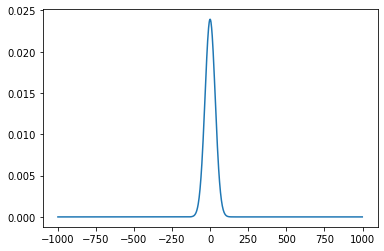

In [5]:
def rho(M,N,beta):
    Z = np.sum(np.exp(ln_omega(M,N) - beta*energia(M,N))) 
    return np.exp(ln_omega(M,N) - beta*energia(M,N))/Z
N = 1000
M = np.arange(-(N-2),N,2)
P = rho(M,N,0.1)
p.plot(M,P)
p.show()

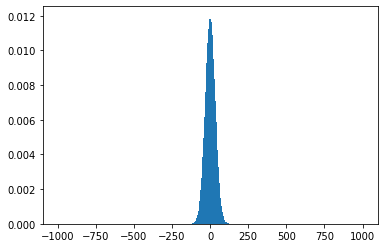

In [6]:
def inv(M,N,T,beta):
    
    P = rho(M,N,beta)
    C = np.zeros(len(P))
    for i in range(len(P)):
        C[i] = np.sum(P[:i+1])
        
    p = np.random.rand(T)
    x = np.zeros(T)
    for i in range(len(p)):
        v = np.where(C>p[i])[0]
        x[i] = M[int(v[0])]
    return x

N = 1000
M = np.arange(-(N-2),N,2)
T = 1000000
amostra = inv(M,N,T,0.1)
#binada = np.arange(-(N-1),N+3,2)
binada = np.arange(-(N-2),N,2)
p.hist(amostra, bins = binada, density = 'true')
p.show()

999


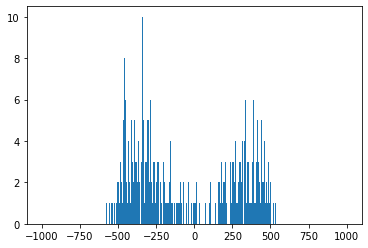

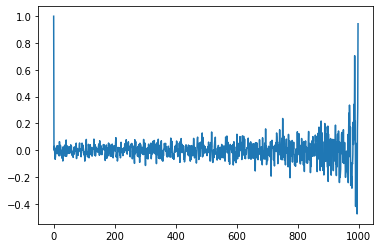

In [7]:
N = 1000
M = np.arange(-(N-2),N,2)
print(len(M))
T = 1000
beta = 1.05

x = inv(M,N,T,beta)
p.hist(x,bins = binada)
p.show()
Tau = np.arange(0,len(x)-1,1)
i = 0
corr = np.zeros(len(Tau))
media = np.sum(x)/T
media_2 = np.sum(x**2)/T
for tau in Tau:
    coisa = np.sum(x[:len(x)-tau]*x[tau:])/(T-tau)
    corr[i] = (coisa - media**2)/(media_2-media**2)
    i += 1
p.plot(Tau,corr)
p.show()

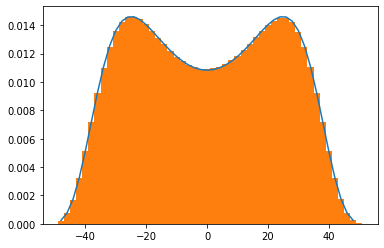

In [35]:
def aleatorio(M,N,beta,T,t):
    arr = np.zeros((T,len(M)))
    for i in range(t):
        P1 = ((N-M)/(2*N)*np.minimum(1,np.exp(-beta*(energia(M+2,N) - energia(M,N)))))
        P2 = ((N+M)/(2*N)*np.minimum(1,np.exp(-beta*(energia(M-2,N) - energia(M,N)))))
        P3 = 1 - P1 - P2
        C = np.array([P1, P1 + P2, P1 + P2 + P3])
        r = np.random.rand(len(M))
        v1 = np.where(r < C[0])
        v2 = np.where(np.logical_and(r>C[0],r<C[1]))
        M[v1] = M[v1]+2
        M[v2] = M[v2] - 2
        
    for i in range(T):
        P1 = ((N-M)/(2*N)*np.minimum(1,np.exp(-beta*(energia(M+2,N) - energia(M,N)))))
        P2 = ((N+M)/(2*N)*np.minimum(1,np.exp(-beta*(energia(M-2,N) - energia(M,N)))))
        P3 = 1 - P1 - P2
        C = np.array([P1, P1 + P2, P1 + P2 + P3])
        r = np.random.rand(len(M))
        v1 = np.where(r < C[0])
        v2 = np.where(np.logical_and(r>C[0],r<C[1]))
        M[v1] = M[v1]+2
        M[v2] = M[v2] - 2
        arr[i] = M
    return np.reshape(arr,T*len(M))


N = 50
M = np.arange(-(N-2),N,2)
beta = 1.05
data = rho(M,N,beta)
p.plot(M,data/2)
T = 10000
t =0

    
#M0 = np.concatenate((np.arange(-500,502,2),np.arange(-500,502,2)))
M0 = inv(M,N,4000,beta)
x = aleatorio(M0,N,beta,T,t) 


binada = np.arange(-(N-1),N+3,2)
p.hist(x, bins = binada, density = 'true')
p.show()

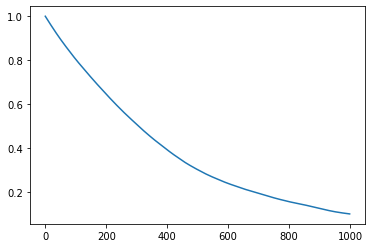

In [41]:

N = 50
M0 = np.array([0])
T = 10000*N
beta = 1.05
x1 = aleatorio(M0,N,beta,T,t) 
Tau = np.arange(0,1000,1)
i = 0
corr = np.zeros(len(Tau))
media = np.sum(x1)/len(x1)
media_2 = np.sum(x1**2)/len(x1)
for tau in Tau:
    coisa = np.sum(x1[:len(x1)-tau]*x1[tau:])/(len(x1)-tau)
    corr[i] = (coisa - media**2)/(media_2-media**2)
    i += 1
p.plot(Tau,corr)
p.show()

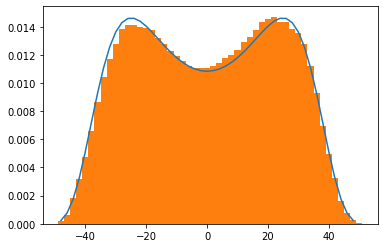

33.39875507354736


In [9]:
def metropolis(N,beta,T,t):
    arr = np.zeros((T,N))
    s0 =  (np.trunc(np.random.rand(N)*2)*2 - 1)       
    for i in range(t):
        s = np.copy(s0)
        v = np.trunc(np.random.rand(1)*N)
        s[int(v[0])] = -s[int(v[0])]
        p = np.random.rand(1)
        M0 = np.sum(s0)
        M = np.sum(s)
        if p < np.minimum(1,np.exp(-beta*(energia(M,N) - energia(M0,N)))):
            s0 = np.copy(s)
    
    for i in range(T):
        s = np.copy(s0)
        v = np.trunc(np.random.rand(1)*N)
        s[int(v[0])] = -s[int(v[0])]
        p = np.random.rand(1)
        M0 = np.sum(s0)
        M = np.sum(s)
        if p < np.minimum(1,np.exp(-beta*(energia(M,N) - energia(M0,N)))):
            s0 = np.copy(s)
        arr[i] = np.copy(s0)
    S = np.sum(arr, axis = 1)
    return S

t = 10000
N = 50

M = np.arange(-(N-2),N,2)
beta = 1.05
data = rho(M,N,beta)
p.plot(M,data/2)

T = 1000000
x=metropolis(N,beta,T,t)
p.hist(x, bins = binada, density = 'true')
p.show()

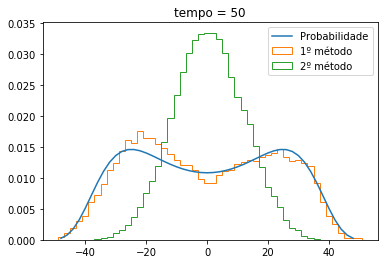

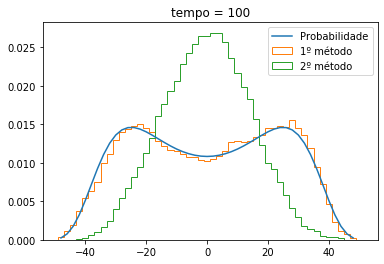

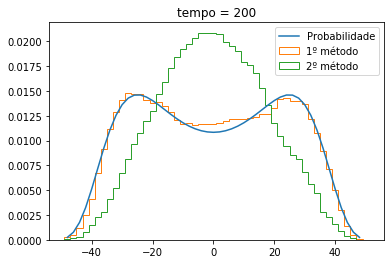

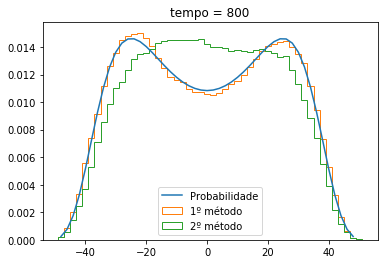

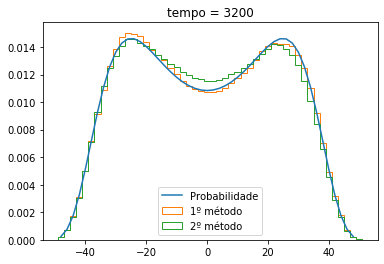

In [140]:
def metropolis_geral(N,num,beta,T,t):
    arr = np.zeros((T,num)) ## mudar 
    s0 =  (np.trunc(np.random.rand(num,N)*2)*2 - 1)       
    
    for i in range(T):
        s = np.copy(s0)
        v = np.trunc(np.random.rand(num)*N)
        v1 = np.arange(0,num,1)
        s[[v1,int(v[0])]] = -s[[v1,int(v[0])]]
        p = np.random.rand(num)
        M0 = np.sum(s0,axis = 1)
        M = np.sum(s, axis = 1)
        ind = np.where( p < np.minimum(1,np.exp(-beta*(energia(M,N) - energia(M0,N)))))
        s0[ind] = np.copy(s[ind])
        arr[i] = np.copy(np.sum(s0, axis = 1))
    return np.reshape(arr,(T*num))

t = 1000
N = 50

M = np.arange(-(N-2),N,2)
beta = 1.05
data = rho(M,N,beta)

num = 1000
M0 = inv(M,N,num,beta)
TAU = [N,2*N,4*N,16*N,64*N]
for T in TAU:
    x_geral=metropolis_geral(N,num,beta,T,t)
    x_aleat = aleatorio(M0,N,beta,T,t)
    p.plot(M,data/2, label = 'Probabilidade')
    p.title('tempo = ' + str(T))
    p.hist(x_aleat, bins = binada, density = 'true', histtype = 'step', label = '1º método')
    p.hist(x_geral, bins = binada, density = 'true', histtype = 'step', label = '2º método')
    p.legend()
    p.show()

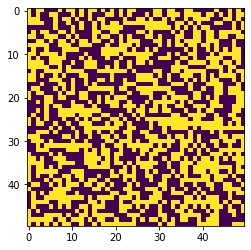

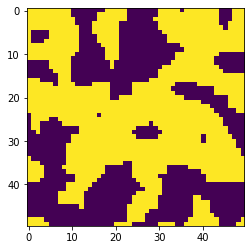

In [137]:


def ising(N,beta,T):
    s0 =  (np.trunc(np.random.rand(N,N)*2)*2 - 1)  
    s1 = np.copy(s0)
    biju = np.arange(0,N,1)
    for i in range(T):
        s = np.copy(s0)
        v1 = np.trunc(np.random.rand()*N)
        v2 = np.trunc(np.random.rand()*N)
        s[int(v1)][int(v2)] = -s[int(v1)][int(v2)]
        
        p = np.random.rand()
        
        
        sM = ( s[(biju + 1)%(N)] + s[:,(biju + 1)%(N)] )*s
        
        sM0 = ( s0[(biju + 1)%(N)] + s0[:,(biju + 1)%(N)] )*s0
        
        H = -np.sum(sM)/N
        H0 = -np.sum(sM0)/N
        
        if p < np.exp(-beta*(H - H0)):
            s0 = np.copy(s)
    return [s0,s1]

matriz = ising(50,200,20000)
p.imshow(matriz[1])
p.show()
p.imshow(matriz[0])
p.show()

    

In [123]:
A = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
v = np.arange(0,4,1)
A[:,(v+1)%4]

array([[ 2,  3,  4,  1],
       [ 6,  7,  8,  5],
       [10, 11, 12,  9],
       [14, 15, 16, 13]])